<a href="https://colab.research.google.com/github/matildecanete/proyecto1/blob/main/Proyecto1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import set_config
set_config(display='diagram')

In [3]:
df = pd.read_csv ("/content/sales_predictions_2023.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Tipo de columna:
- Item_Identifier: Nominal
- Item_Weight: Numérica
- Item_Fat_Content: Ordinal
- Item_Visibility: Numérica
- Item_Type: Nominal
- Item_MRP: Numérica
- Outlet_Identifier: Nominal
- Outlet_Establishment_Year: Numérica
- Outlet_Size: Ordinal
- Outlet_Location_Type: Nominal
- Outlet_Type: Nominal
- Item_Outlet_Sales: Numérica

In [6]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Valores faltantes:

- Item_Weight (1463)

- Outlet_Size (2410)

In [7]:
df.duplicated().sum()

0

Codificación Ordinal columna "Outlet_Size".

In [8]:
df["Outlet_Size"].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [9]:
df["Outlet_Size"].replace({"Small" : 0 , "Medium" : 1 , "High" : 2} , inplace=True)

In [10]:
df["Outlet_Size"].value_counts()

Outlet_Size
1.0    2793
0.0    2388
2.0     932
Name: count, dtype: int64

Codificación Ordinal "Item_Fat_Content" y correción de sus datos inconsistentes.

In [11]:
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [12]:
df["Item_Fat_Content"].replace("LF" , "Low Fat" , inplace = True)
df["Item_Fat_Content"].replace("low fat" , "Low Fat" , inplace = True)
df["Item_Fat_Content"].replace("reg" , "Regular" , inplace = True)
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [13]:
df["Item_Fat_Content"].replace({"Low Fat" : 0 , "Regular" : 1}, inplace=True)
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
0    5517
1    3006
Name: count, dtype: int64

Matriz de características, valor objetivo y validación del modelo.

In [14]:
y = df["Item_Outlet_Sales"]
X = df.drop(columns= ["Item_Outlet_Sales" , "Item_Identifier"])
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

Pipeline

In [15]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [16]:
freq_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')

In [17]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
scaler = StandardScaler()

In [18]:
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [19]:
numeric_pipe = make_pipeline(median_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [20]:
category_tuple = (categorical_pipe, cat_selector)
number_tuple = (numeric_pipe, num_selector)

In [21]:
preprocessor = make_column_transformer(category_tuple, number_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ba73c308940>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ba73c308f40>)])

In [22]:
preprocessor.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ba73c308940>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ba73c308f40>)])

In [23]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [24]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')

0 missing values in training data
0 missing values in testing data


In [25]:
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)

All data in X_train_processed are float64
All data in X_test_processed are float64


1. Crear un modelo de Regresión lineal para predecir las ventas.

- Modelo de Regresión lineal.

In [26]:
reg = LinearRegression()

In [27]:
reg.fit(X_train_processed, y_train)

LinearRegression()

In [28]:
train_preds_reg = reg.predict(X_train_processed)
test_preds_reg = reg.predict(X_test_processed)

- Evalúen el rendimiento del modelo basándose en r^2.

In [29]:
r2_train_reg = r2_score(y_train, train_preds_reg).round(2)
print(r2_train_reg)
r2_test_reg = r2_score(y_test , test_preds_reg).round(2)
print(r2_test_reg)

0.56
0.58


- Evalúen el rendimiento del modelo basándose en RECM.

In [30]:
rmse_train_reg = np.sqrt(mean_squared_error(y_train , train_preds_reg)).round(2)
print(rmse_train_reg)
rmse_test_reg = np.sqrt(mean_squared_error(y_test , test_preds_reg)).round(2)
print(rmse_test_reg)

1143.03
1071.09


2. Crear un modelo de Árbol de regresión para predecir las ventas.

- Modelo Árbol de regresión.

In [31]:
dec_tree = DecisionTreeRegressor(max_depth=8 , random_state = 42)

In [32]:
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(max_depth=8, random_state=42)

In [33]:
train_preds_tree = dec_tree.predict(X_train_processed)
test_preds_tree = dec_tree.predict(X_test_processed)

- Comparen el rendimiento del modelo basándose en r^2.

In [34]:
r2_train_tree = r2_score(y_train, train_preds_tree).round(2)
print(r2_train_tree)
r2_test_tree = r2_score(y_test , test_preds_tree).round(2)
print(r2_test_tree)

0.64
0.57


- Comparen el rendimiento del modelo basándose en RECM.  

In [35]:
rmse_train_tree = np.sqrt(mean_squared_error(y_train , train_preds_tree)).round(2)
print(rmse_train_tree)
rmse_test_tree = np.sqrt(mean_squared_error(y_test , test_preds_tree)).round(2)
print(rmse_test_tree)

1031.22
1082.25


In [36]:
data = {
    'R2': [r2_train_reg,r2_test_reg],
    'RMSE': [rmse_train_reg,rmse_test_reg]}
row_names = ['Train', 'Test']
metrica_dec1 = pd.DataFrame(data, index=row_names)
print('Métricas modelo de Regresión lineal')
print(metrica_dec1)
print('\n')
data = {
    'R2': [r2_train_tree,r2_test_tree],
    'RMSE': [rmse_train_tree,rmse_test_tree]}
row_names = ['Train', 'Test']
metrica_dec2 = pd.DataFrame(data, index=row_names)
print('Métricas modelo de Árbol de regresión')
print(metrica_dec2)

Métricas modelo de Regresión lineal
         R2     RMSE
Train  0.56  1143.03
Test   0.58  1071.09


Métricas modelo de Árbol de regresión
         R2     RMSE
Train  0.64  1031.22
Test   0.57  1082.25


3. Acaban de intentar 2 diferentes modelos en el conjunto de datos. Deben determinar qué modelo implementar.

El modelo de Regresión lineal tiene un R2 de entrenamiento (0.56) un poco más bajo que el modelo de Árbol de regresión (0.64). Sin embargo, su R2 en el conjunto de prueba es levemente más alto (0.58 vs 0.57), lo que significa que tiene mayor capacidad para predecir datos nuevos. Su RMSE en test es más bajo por lo que, en promedio, sus predicciones están más cerca de los valores reales en el conjunto de prueba.

Se recomienda utilizar el modelo de Regresión lineal ya que tiene un desempeño más equilibrado en el conjunto de prueba, realiza mejores predicciones, lo cual es muy importante para una predicción de ventas. El Árbol de regresión muestra un pequeño overfitting y una capacidad de realizar predicciones precisas más baja.



4. Para concluir este proyecto, deben preparar una presentación ejecutiva (no técnica) sobre el proyecto.

Incluyan dos ideas del análisis con el apoyo de imágenes de calidad adecuadas para la “presentación de informes”.

Gráfico predicciones Regresión lineal.

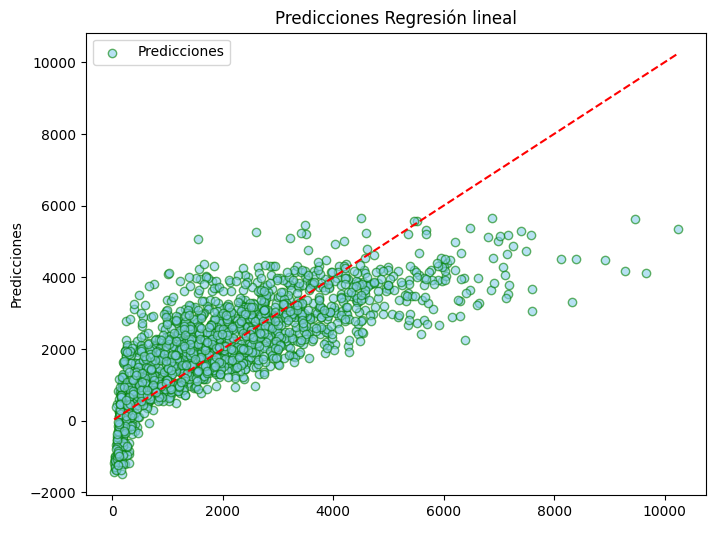

In [41]:
pred_test = reg.predict(X_test_processed)
plt.figure(figsize=(8, 6))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.scatter(y_test, pred_test, color='skyblue', alpha=0.6, edgecolors='green', label='Predicciones')
plt.xlabel(" ")
plt.ylabel("Predicciones")
plt.title("Predicciones Regresión lineal")
plt.legend()
plt.show()

Gráfico predicciones Árbol de regresión.

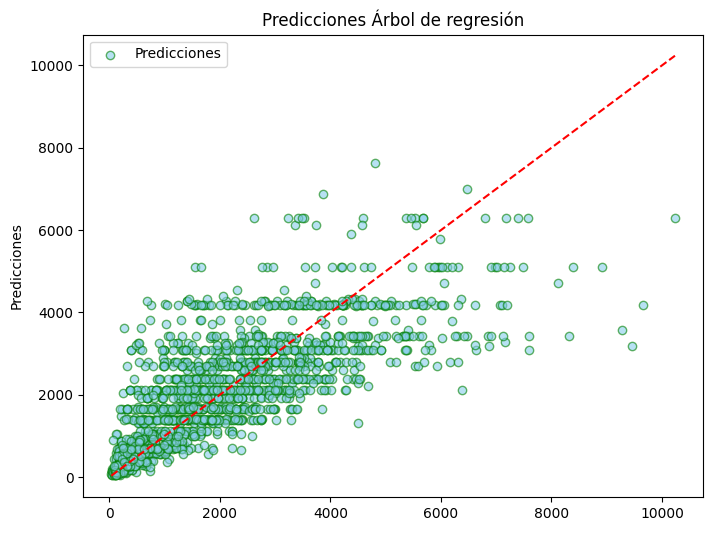

In [40]:
pred_dec_test = dec_tree.predict(X_test_processed)
plt.figure(figsize=(8, 6))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.scatter(y_test, pred_dec_test, color='skyblue', alpha=0.6, edgecolors='green', label='Predicciones')
plt.xlabel(" ")
plt.ylabel("Predicciones")
plt.title("Predicciones Árbol de regresión")
plt.legend()
plt.show()